In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTENC,SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, ShuffleSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier


# E-Commerce Customer Churn 
   by: 
1. Muhammad Nanda Reza Putra
2. Andri Rifky Aditama

Sumber Data: [E-Commerce Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

# Business Problem Understanding

## Context
Perkembangan Teknologi telah memtransformasi insdustri perdagangan dunia. Pergeseran ini membuat pola perdagangan dunia juga beralih ke perdagangan secara online. Banyak Perusahaan yang membuat pelanggan melakukan **Churn**. **Churn** pada E-Commerce adalah suatu perilaku pelanggan berhenti melakukan transaksi pada perusahaan E-Commerce. Nilai dari pelanggan yang melakukan **Churn** mengindikasikan seberapa banyak pelanggan yang tidak melakukan transaksi lagi pada perusahaan ini. Tingginya **Churn Rate** adalah sesuatu yang ingin dihindari pada bisnis ini. **Churn Rate** yang tinggi mengindikasikan bahwa pelanggan mungkin tidak puas dengan barang atau jasa diberikan. Perusahaan akan lebih mempertahankan pelanggan, karena dibutuhkan biaya lebih besar untuk mencari pelanggan yang baru. Sebuah perusahaan 'X' pada suatu negara memiliki bisnis perusahaan *E-Commerce* dimana para pelanggan dapat bertransaksi untuk berbelanja peralatan elektronik (Laptop & aksesoris dan Handphone), pakaian , grosir dan lainnya. Perusahaan ini ingin mengetahui *behavior* pelanggan yang melakukan **Churn** dan ingin mengurangi jumlah pelanggan yang **Churn**. Dilakukan sebuah model prediksi yang tepat untuk menentukan pelanggan yang berhenti bertransaksi (churn) atau tidak menggunakan machine learning. Dengan target yang ditentukan sebagai berikut :

Target: 
* 0 : Customer tidak Churn 
* 1 : Customer Churn

# Problem Statement

Pada suatu perusahaan tingginya pelanggan yang melakukan *Churn* merupakan suatu indikator tingkat kegagalan suatu perusahaan E-Commerce. Dimana apabila *Churn rate* sebesar 5 % maka kita akan kehilangan 5 % dari pelanggan tersebut. Tentu, Perusahaan sebisa mungkin harus menekan nilai *churn rate* ini sekecil mungkin. Sehingga diperlukan upaya untuk mengurangi persentase pelanggan yang melakukan *Churn*. Seperti disebutkan sebelumnya bahwa untuk mencari pelanggan lebih dibutuhkan biaya yang lebih besar dibandingkan mempertahankan pelanggan [sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate#:~:text=Customer%20churn%20rate%20is%20the,up%20and%20stay%20with%20you.). menurut [sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate#:~:text=Customer%20churn%20rate%20is%20the,up%20and%20stay%20with%20you.) apabila kita melakukan suatu *ads* untuk menarik pelanggan baru dgn biaya sebesar 100 dolar perbulan untuk mendapatkan pelanggan baru dan biaya perpelanggan perbulan sebesar 50 dolar, maka setidaknya setiap bulan harus ada 2 pelanggan untuk menutup biaya pelanggan baru tersebut. Salah satu cara perusahaan telekomunikasi mempertahankan pelanggannya agar tidak melakukan Churn yaitu memberikan insentif retensi terhadap pelanggan. Insentif retensi terdiri dari berbagai macam seperti memberikan potongan harga, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain. Namun, kebijakan pemberian insentif retensi belum dilakukan secara efektif. Kebijakan tersebut sering ditemui berbagai kendala bahkan membuat
perusahaan semakin merugi. 

## Goals

Sehingga dari permasalahan yang ada, perusahaan ingin memiliki kemampuan untuk dilakukannya prediksi kemungkinan seorang pelanggan akan *Churn* atau tidak. Untuk memfokuskan upaya retensi,pemberian insentif meningkatkan pelayanan pada pelanggan yang terindikasi akan melakukan *Churn*. Selain itu juga agar perusahaan mengetahui faktor yang memengaruhi pelanggan bertahan agar strategi bisnis yang dilakukan tepat dengan keinginan pelanggan untuk menurunkan tingkat dari pelanggan yang *Churn*.

## Analytics Approach

Akan dilakukan analisa bagaimana faktor pembeda dari pelanggan yang melakukan *Churn* dan tidak. selanjutnya akan dibuat model klasifikasi untuk memprediksi probabilitas dari pelanggan akan melakukan *Churn* atau tidak.


## Confussion Metric

![](https://txt.cohere.ai/content/images/2022/06/feature.png)


Target utama dalam masalah ini adalah pelanggan yang berhenti berlangganan (Churn), seperti target yang sudah disebutkan pada context sebelumnya yaitu:

Target:
* 0 : Tidak Churn 
* 1 : Churn

False Positive yaitu pelanggan yang aktualnya tidak tetapi diprediksi churn.<br>
**Konsekuensi** : Tidak efektif dalam pemberian insentif. <br>
False negative yaitu pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn. <br>
**Konsekuensi** : Kehilangan pelanggan.

Berdasarkan Metric Evaluation yang ada akan digunakan serta konsekuensi yang ada. Akan dibuat model yang akan mengurangi resiko kehilangan pelanggan karena untuk mendapatkan pelanggan baru membutuhkan biaya lebih banyak dibandingkan kita mempertahankan pelanggan yang ada. Sehingga kita akan fokus pada nilai FN dengan mendapatkan nilai recall yang tinggi dan tetap membandingkan nilai precision agar tidak terlalu jauh. Kita ingin recall dan precisionya seimbang sehingga digunakan metric f1_score dengan data yang imbalance. Dilakukan juga Sampling Undersampling (NearMiss) dan Oversampling(SMOTE). Selanjutnya akan dibandingkan model mana yang paling cocok untuk digunakan pada kasus ini.

## Data Understanding
Sumber Data: [E-Commerce Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

Dataset merupakan data dari sebuah perusahaan terkemuka 'X'
Terdapat 20 kolom yang menmemberikan informasi mengenai ID customer, churn atau tidak, login menggunakan device apa dan lain-lain.



## Attribute Information

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| Customer ID | Int | Unique customer ID |
| Churn | Int | Churn Flag 0 : Tidak Churn, 1 : Churn |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | Text | Preferred login device of customer |
| CityTier | Int | City tier |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Text | Preferred payment method of customer |
| Gender | Text | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Int | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Object | Preferred order category of customer in last month |
| SatisfactionScore | Int | Satisfactory score of customer on service |
| MaritalStatus | Object | Marital status of customer|
| NumberOfAddress | Int | Total number of added added on particular customer |
| Complain | Int | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Float | Average cashback in last month |

## Explanatory Data Analysis (EDA)

In [2]:
df=pd.read_excel('E_commerce.xlsx', sheet_name='E Comm')

In [3]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
df.isna().sum()/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         0.046892
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045293
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

In [5]:
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
def unik (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:10])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    unik=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return unik

In [7]:
unik(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,CustomerID,int64,5630,0,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,2,0,"[1, 0]"
2,Tenure,float64,36,264,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,3,0,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,3,0,"[3, 1, 2]"
5,WarehouseToHome,float64,34,251,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,7,0,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,object,2,0,"[Female, Male]"
8,HourSpendOnApp,float64,6,255,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,6,0,"[3, 4, 5, 2, 1, 6]"


## Value yang sama

In [8]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [9]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [10]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

### Mengubah Value yang memiliki arti yang sama 
Pada kolom **PreferrefPaymentMode**,**PreferredOrderCat** dan **PreferredLoginDevice**

In [11]:
df=df.replace({'CC':'Credit Card','COD':'Cash on Delivery'})
df=df.replace({'Mobile':'Mobile Phone','Phone':'Mobile Phone'})


In [12]:
unik(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,CustomerID,int64,5630,0,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,2,0,"[1, 0]"
2,Tenure,float64,36,264,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,2,0,"[Mobile Phone, Computer]"
4,CityTier,int64,3,0,"[3, 1, 2]"
5,WarehouseToHome,float64,34,251,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,5,0,"[Debit Card, UPI, Credit Card, Cash on Deliver..."
7,Gender,object,2,0,"[Female, Male]"
8,HourSpendOnApp,float64,6,255,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,6,0,"[3, 4, 5, 2, 1, 6]"


In [13]:
df_duplicated=df.drop(columns='CustomerID')

In [14]:
df_duplicated.duplicated().sum()

557

## Missing Value

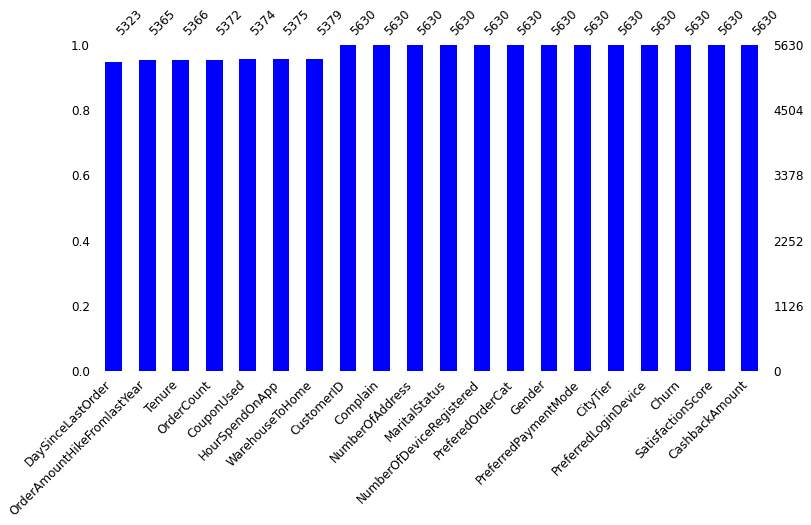

In [15]:
msno.bar(df, sort="ascending", figsize=(12,6), fontsize=12, color='blue');

Berdasarkan visualisasi yang sudah dilakukan didapatkan informasi bahwa **missing value** terdapat pada feature DaySinceLastOrder,OrderAmountHikeFromlastYear,Tenure,OrderCount,CouponUsed,HoursSpendonApp dan WarehouseToHome

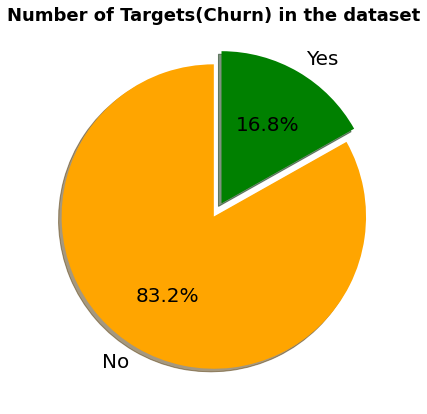

In [16]:
plt.figure(figsize=(7,7))
plt.title("Number of Targets(Churn) in the dataset", size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], colors=["orange","green"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

In [17]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

Berdasarkan Visualisasi yang dilakukan terhadap target, didapatkan informasi bahwa terdapat 16.8% pelanggan yang melakukan Churn dari keseluruhan pelanggan.

## Numerical Features

In [18]:
from scipy.stats import normaltest


,column,skewness,pvalue score
0,Tenure,0.736513,5.186549e-86
1,WarehouseToHome,1.619154,0.000000e+00
2,DaySinceLastOrder,1.191000,4.411831e-285
3,CashbackAmount,1.149846,4.411831e-285


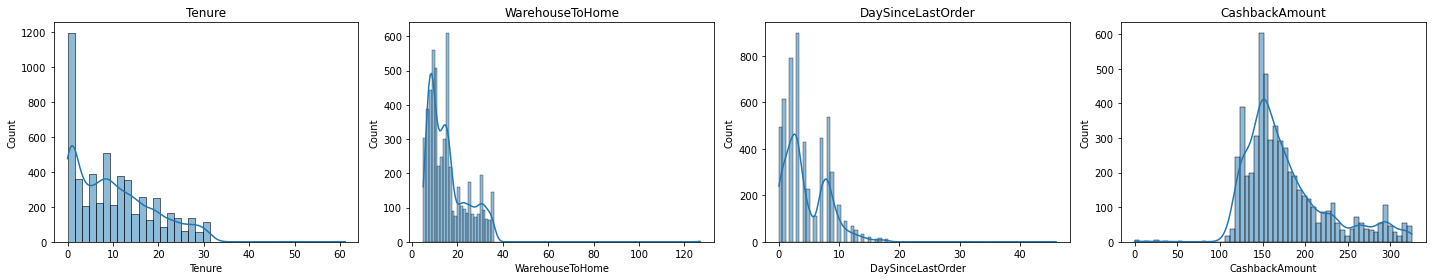

In [19]:
continuous_viz = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
fig = plt.figure(figsize=(20,4))
subplot = 1

for cont in continuous_viz:
    plt.subplot(1,4,subplot)
    sns.histplot(data=df, x=cont, kde=True)
    plt.title(cont)
    plt.tight_layout()
    subplot+=1

pvalue_cont = []
skew_cont = []

for cont in continuous_viz:
    if df[cont].isna().any() == True:
        s, pval = normaltest(df[cont].dropna())
        pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(df[cont].dropna())
        pvalue_cont.append(pval)
    skew_cont.append(df[cont].skew())

pvalue_cont = pd.DataFrame({'column': continuous_viz, 'skewness': skew_cont, 'pvalue score': pvalue_cont})
pvalue_cont

Berdasarkan visualisasi yang telah dilakukan didapatkan informasi sebagai berikut :
* Pada Kolom Numerical yang bersifat kontinyu datanya bersifat right skew (skewness > 0)
* Pada Kolom **Tenure** didapatkan bahwa pelanggan melakukan transaksi selama 2 bulan awal dan selanjutnya cenderung fluktuatif
* Pada kolom **WarehouseToHome** didapatkan bahwa jarak terdekat dari warehouse ke rumah pelanggan pada jarak 5 km dan jarak terjauh pada 127 km
* Pada kolom **DaySinceLastOrder** didapatkan bahwa pelanggan banyak melakukan transaksi selama 4 hari setelah transaksi terakhir
* Pada kolom **CashbackAmount** didapatkan bahwa rata-rata pelanggan mendapatkan cashback sebesar 150$ berdasarkan data transaksi 

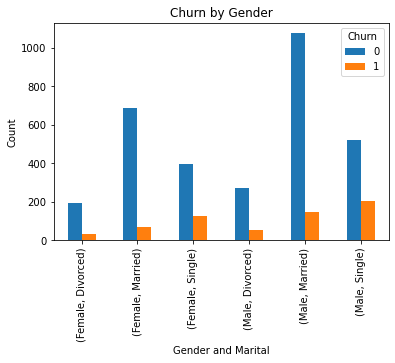

In [100]:
group = df.groupby(['Gender','MaritalStatus', 'Churn']).count()['CustomerID']

group.unstack().plot(kind='bar', stacked=False)

plt.xlabel('Gender and Marital')
plt.ylabel('Count')
plt.title('Churn by Gender')

plt.show()

## Data Correlation

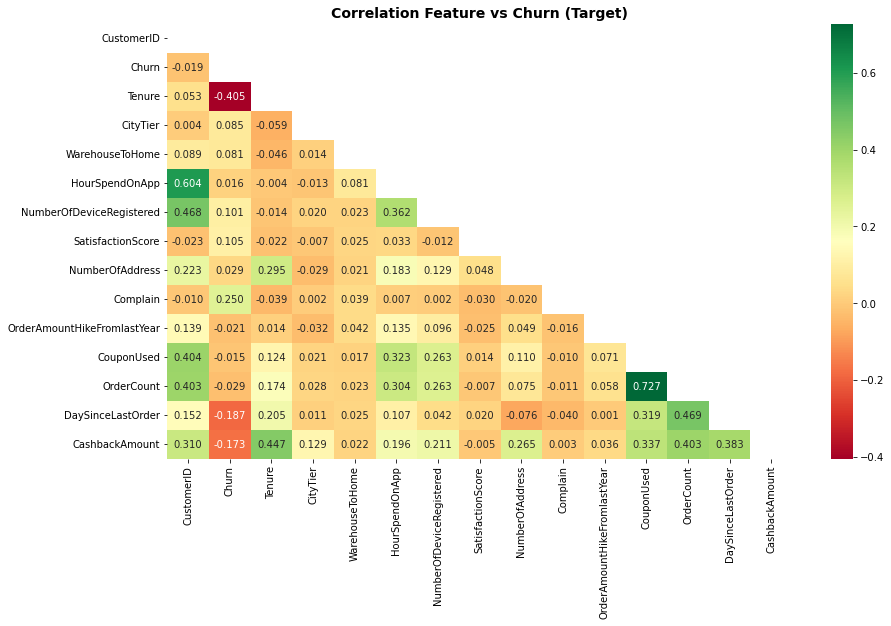

In [21]:
corr = df.corr('spearman')
plt.figure(figsize=(14,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Feature vs Churn (Target)', size=14, weight='bold');


Dilakukan Visualisasi heatmap untuk melihat korelasi antara feature dan target didapatkan informasi sebagai berikut :
* Pada Kolom **Complain** memiliki korelasi positif terbesar yaitu dengan nilai korelasi **0.250**
* Pada Feature **Tenure** memiliki korelasi negatif terbesar yaitu dengan nilai korelasi **-0.405** 
* Pada Feature lainnya memiliki nilai korelasi yang rendah yaitu dibawah **0.2** baik untuk korelasi negatif maupun positif

## Categorical vs Target

In [22]:
from scipy.stats import chi2_contingency

In [23]:
# Melakukan uji chi square
cat_columns = list(df.describe(include='O').columns)
chi2_score = []

for i in cat_columns:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_score.append(round(pvalue, 5))

df_chi_score = pd.DataFrame({'categorical_features': cat_columns,'chi2_score': chi2_score})
df_chi_score['notes'] = np.where(df_chi_score['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_score

,categorical_features,chi2_score,notes
0,PreferredLoginDevice,0.00015,dependent
1,PreferredPaymentMode,0.00000,dependent
2,Gender,0.03082,dependent
3,PreferedOrderCat,0.00000,dependent
4,MaritalStatus,0.00000,dependent


In [24]:
!pip install missingno

In [25]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [26]:
listItem = []

for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

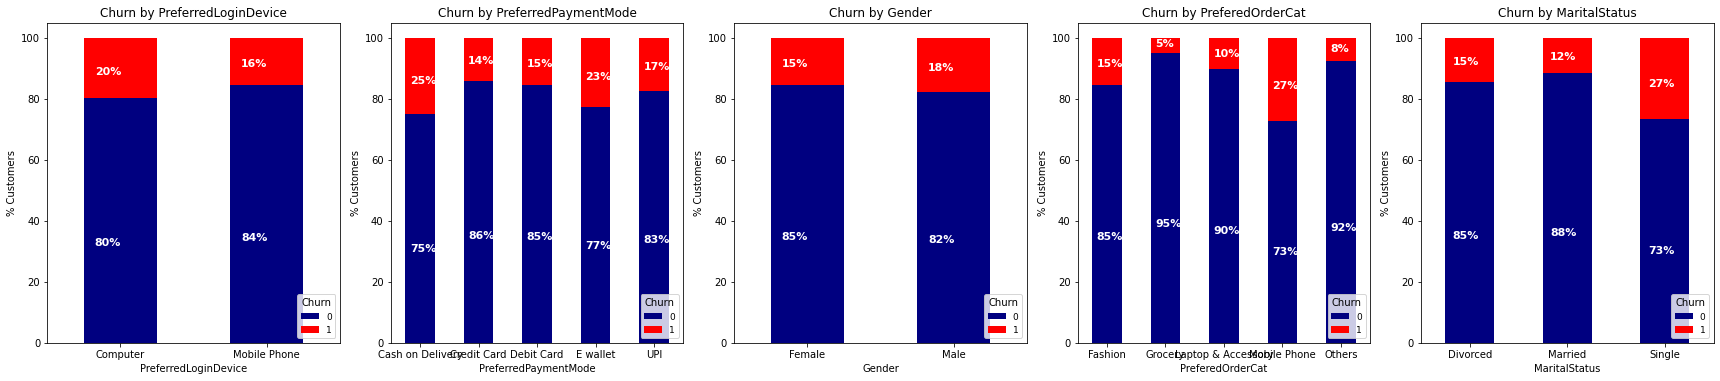

In [27]:
plt.figure(figsize=(24, 10), facecolor='white')
plotnumber = 1

for feature in cat_features[:]:

        column1 = feature

        # membuat table berdasarkan 2 kolom kategorikal
        groupby_table = df.groupby([column1,'Churn']).size().unstack()

        # fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot (letak grafik)
        ax = plt.subplot(2, 5, plotnumber)
        
        # Value berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,
                                                                color = ['navy', 'red'])

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # menambahkan label data pada stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
                
        plt.tight_layout();
        
        plotnumber += 1
        

Berdasarkan hasil dari visualisasi yang dilakukan categorical feature vs Target (Churn) didapatkan hasil sebagai berikut :
* Pada Feature PreferredLoginDevice didapatkan informasi bahwa para pelanggan yang melakukan transaksi menggunakan Computer cenderung lebih banyak melakukan Churn dibandingkan dengan pelanggan yang melakukan transaksi menggunakan Mobile Phone masing-masing sebesar 20% dan 16% dari proporsi pelanggan yang melakukan Churn
* Pada Feature PreferredPaymentMode didapatkan informasi bahwa para pelangagan yang melakukan pembayaran menggunakan Cash on Delivery cenderung lebih banyak melakukan Churn yaitu sebesar 25% dan diikuti oleh pembayaran menggunakan E-Wallet, Debitcard.
* Pada Feature Gender didapatkan informasi bahwa pelanggan laki-laki cenderung melakukan churn masing-masing sebesar 18% dan 15 %
* Pada Feature PreferredOrderCategory didapatkan informasi bahwa para pelanggan cenderung melakukan churn pada transaksi catergory Mobile Phone yaitu dengan proporsi 27% diikuti oleh pelanggan yang melakukan Churn sebesar 15%, Laptop dan Acc sebesar 10 %
* Pada Feature MaritalStatus didapatkan informasi bahwa para pelnggan yang single cenderung melakukan churn yaitu sebesar 27% diikuti oleh Divorced sebesar 15% dan Married sebesar 12 %

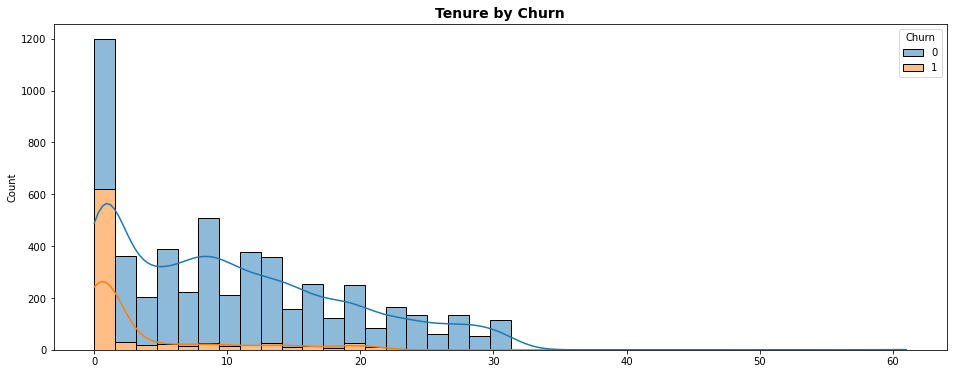

In [28]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn',kde=True, multiple='stack')
ax.set_title('Tenure by Churn', size=14, weight='bold')
ax.set_xlabel(None);

Berdasarkan hasil visualisasi diatas didapatkan informasi :
* Para pelanggan e-commerce banyak pada bulan-bulan awal dan bulan selanjutnya cenderung fluktuatif
* Pelanggan pada bulan-bulan awal juga cenderung paling banyak melakukan Churn dibandingkan bulan-bulan selanjutnya.

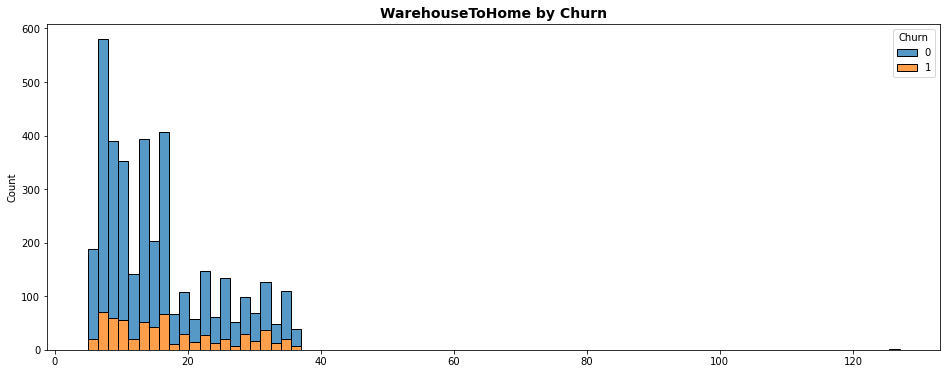

In [91]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='WarehouseToHome', hue='Churn', multiple='stack')
ax.set_title('WarehouseToHome by Churn', size=14, weight='bold')
ax.set_xlabel(None);

Berdasarkan hasil Visualisasi diatas didapatkan informasi sebagai berikut:
* Jarak Rumah pelanggan dengan Warehouse didominasi oleh pelanggan yang jarak warehousenya dekat dengan rumah pelanggan <20.
* Pelanggan yang rumahnya dekat dengan warehouse juga cenderung lebih banyak Churn.

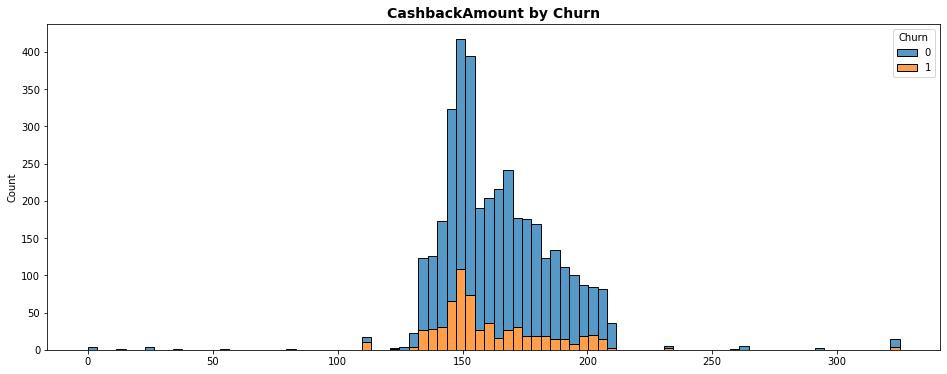

In [92]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='CashbackAmount', hue='Churn', multiple='stack')
ax.set_title('CashbackAmount by Churn', size=14, weight='bold')
ax.set_xlabel(None);

Berdasarkan Visualisasi diatas didapatkan informasi sebagai berikut:
* CashbackAmount para pelanggan cenderung banyak pada 125-200$ 
* Pelanggan paling banyak mendapatkan cashback sebesar 150$  
* Pelanggan dengan cashback terbesar justru paling banyak melakukan Churn dibandingkan dengan jumlah cashback yang lain.

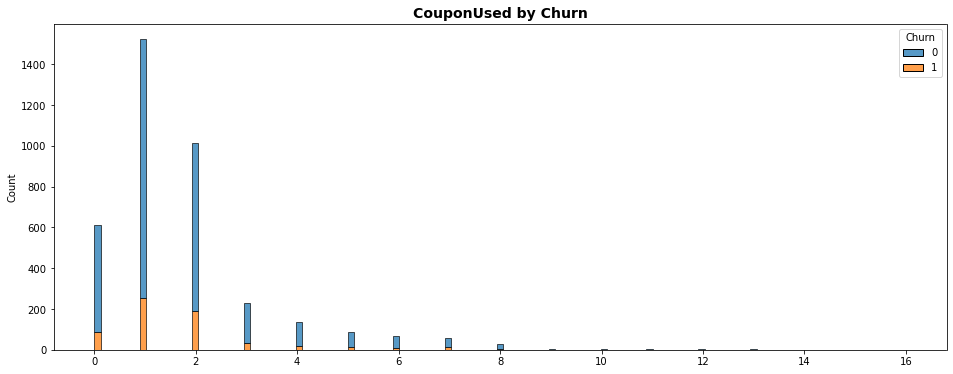

In [93]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='CouponUsed', hue='Churn', multiple='stack')
ax.set_title('CouponUsed by Churn', size=14, weight='bold')
ax.set_xlabel(None);

Apakah Pelanggan yang melakukan Complain akan Churn?

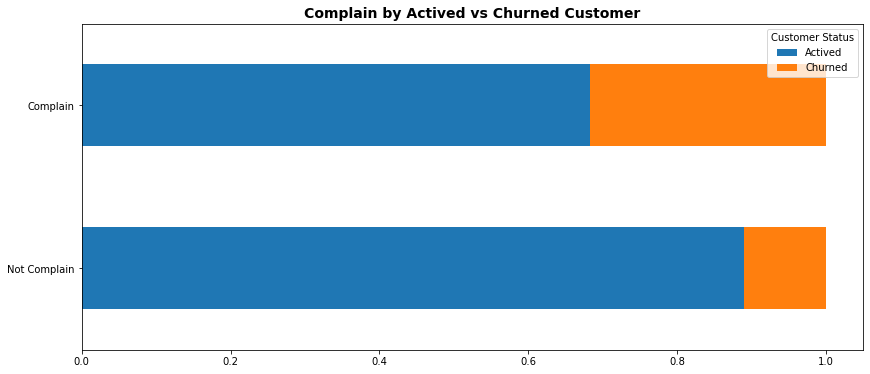

In [33]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

Berdasarkan proporsi dari perilaku pelanggan yang melakukan complain didapati informasi sebagai berikut :
* Pelanggan yang melakukan Complain Cenderung melakukan **Churn** dengan proporsi yang lebih besar yaitu sebesar 35 % dibandingkan dengan pelanggan yang tidak melakukan complain melakukan **Churn**

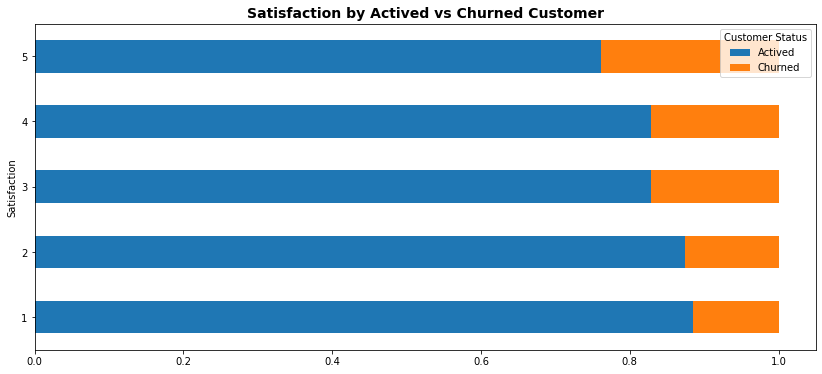

In [34]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
complain_churn = df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Satisfaction by Actived vs Churned Customer', size=14, weight='bold')
# plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel('Satisfaction')
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

Berdasarkan hasil visualisasi yang dilakukan didapatkan informasi sebagai berikut:
* Pelanggan yang melakukan Churn, menariknya adalah para pelanggan yang memberikan nilai satisfaction 5 dan sebaliknya pelanggan yang memberi nilai 1 justru paling sedikit melakukan Churn. Hal ini sangat mungkin karena para pelanggan yang memberikan nilai 1 namun tetap menggunakan e-commerce. Sebaiknya Perusahaan meningkatkan lagi survey kepuasan pelanggan seperti memberikan layanan cepat terhadap kepuasan pelanggan.  Pada era digital sekarang ini, sebuah masukan atau saran untuk perusahaan bisa dilakukan lebih cepat dan ringkas melalui email ataupun melalui social media. Informasi yang diperoleh dari saran dan keluhan ini dapat dijadikan ide-ide baru dan masukkan yang berharga bagi perusahaan, sehingga perusahaan akan beraksi dengan tanggap dan cepat untuk mengatasi masalah-masalah yang ada. Selain mendapatkan kritik dan saran dari pelanggan, penanganan komplain juga bisa menjadi salah satu kepuasan pelanggan. Jika komplain diatasi dengan baik, pelanggan tentunya merasa senang dengan pelayanan dan tidak akan bosan dengan produk atau jasa yang ditawarkan.

## Data Cleaning

### Deleted Missing Value

In [35]:
df.isna().sum()/len(df)*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

missing value pada data hanya sebesar 4,5%-5,4% dari total keseluruhan data. Sehingga data-data ini akan di drop atau diabaikan untuk melanjutkan pada proses prediksi.

In [36]:
df_clean=df.dropna()
df_clean.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [37]:
df_clean['Churn'].value_counts()

0    3143
1     631
Name: Churn, dtype: int64

### Data Outliers Drop

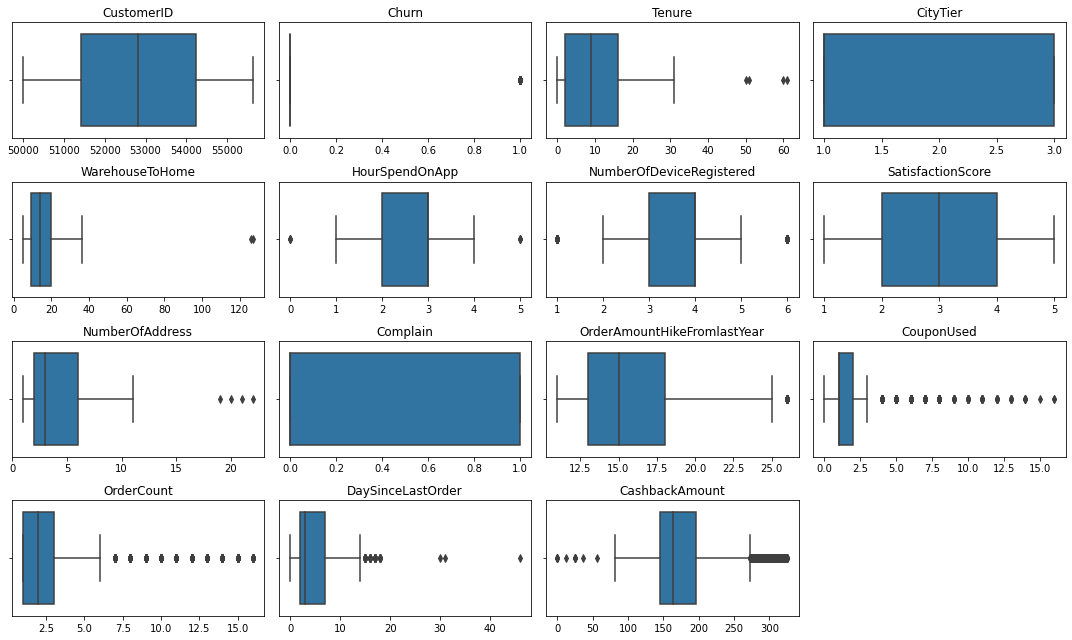

In [38]:
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

In [39]:
def outlier(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    LIMIT=IQR*1.5
    print(f'IQR: {IQR}')
    upper=Q3+LIMIT
    lower=Q1-LIMIT
    print(f'Upper Limit: {upper}')
    print(f'Lower Limit: {lower}')

In [40]:
outliers=['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
          'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
          'CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']

In [41]:
list_outlier=[]
for i in outliers:
    list_outlier.append([print(i),
    outlier(df[i]),
    print()])

Tenure
IQR: 14.0
Upper Limit: 37.0
Lower Limit: -19.0

WarehouseToHome
IQR: 11.0
Upper Limit: 36.5
Lower Limit: -7.5

HourSpendOnApp
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

NumberOfDeviceRegistered
IQR: 1.0
Upper Limit: 5.5
Lower Limit: 1.5

NumberOfAddress
IQR: 4.0
Upper Limit: 12.0
Lower Limit: -4.0

OrderAmountHikeFromlastYear
IQR: 5.0
Upper Limit: 25.5
Lower Limit: 5.5

CouponUsed
IQR: 1.0
Upper Limit: 3.5
Lower Limit: -0.5

OrderCount
IQR: 2.0
Upper Limit: 6.0
Lower Limit: -2.0

DaySinceLastOrder
IQR: 5.0
Upper Limit: 14.5
Lower Limit: -5.5

CashbackAmount
IQR: 50.6225
Upper Limit: 272.32625
Lower Limit: 69.83625



In [42]:
# Drop Outliers
# df = df[(df['WarehouseToHome']<120)]

In [43]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [44]:
df.isna().sum()
df=df.dropna()
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [45]:
df['Churn'].value_counts()

0    3143
1     631
Name: Churn, dtype: int64

In [46]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Mobile Phone,1,11.0,Cash on Delivery,Male,2.0,3,Mobile Phone,3,Single,2,1,13.0,2.0,2.0,2.0,134.41


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

## Data Preprocessing

Feature = CustomerID, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount <br>
Target= Churn

In [48]:
df_churn=df.copy()
df_churn['Churn'].value_counts()

0    3143
1     631
Name: Churn, dtype: int64

In [49]:
x=df_churn.drop(columns='Churn')
y=df_churn['Churn']

## Scaling

Pada permodelan machine learning akan dicoba menggunakan algoritma *Logistic Regression* dan *KNN* maka akan dilakukan scalling pada data kita. permodelan diharapkan memiliki skala yang sama sehingga akan maksimal dalam target. jika tidak dilakukan scaling maka variabel dengan skala besar akan mendominasi yang kecil. Pada data numerikal juga tidak memiliki outlier (**Tenure, WarehouseToHome dan lain-lain**) sehingga dapat digunakan MinMaxScaler().

In [50]:
scaler = MinMaxScaler()

## Resampling

Karena Data yang kita miliki tidak seimbang untuk mengatasinya sehingga kita akan menggunakan metode resampling agar data memiliki distribusi kelas yang lebih seimbang.

Akan dilakukan Ujicoba Oversampling dan UnderSampling dan akan dilihat parameter mana yang lebih maksimal dalam permodelan kita. Dimana pada oversampling kita akan menggunakan : <br>
SMOTE()

Dan pada data Undersampling :<br>
Nearmiss()


In [51]:
#Digunakan untuk oversampling
resample = SMOTE() 

#Digunakan untuk undersampling
rus=NearMiss()


## Data Splitting

pada permodelan digunakan train size = 0.7 sehingga data training kita adalah sebesar 70% dari dataset. kemudian karena menggunakan klasifikasi untuk memprediksi data yang sifatnya kategorik, kita menggunakan stratify =y agar proporsi y_train dan y_test sama.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size =0.8, random_state=42)


## Data Transformer (Encoding)

1. Mengubah feature **PrefferdLoginDevice,PreferredPaymentMode,'Gender', 'PreferredOrderCat', 'MaritalStatus'** karena fitur ini jumlah unique nya hanya sedikit dan tidak memiliki kelas/urutan(ordinal) sehingga kita encode menggunakan **One Hot Encoding**.


In [53]:
transformer=ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['PreferredLoginDevice','PreferredPaymentMode',
                                            'Gender', 'PreferedOrderCat', 'MaritalStatus']),
],remainder='passthrough')

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [55]:
# Model
logreg=LogisticRegression(random_state=42)
knn=KNeighborsClassifier(n_neighbors=62)
tree=DecisionTreeClassifier(random_state=42,max_depth=3)
rf = RandomForestClassifier(random_state=42,max_depth=3)
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=42,max_depth=3)
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=3)


In [56]:
skfold= StratifiedKFold(n_splits = 5)

In [57]:
models = [logreg, knn, tree, rf, ada, gbc, xgb]

mean_with_sampling = []
std_with_sampling = []
mean_without_sampling = []
std_without_sampling = []

mean_with_undersampling=[]
std_with_undersampling=[]

for model in  models :

    # modeling with oversampling
    pipe_model_with_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('model', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator = pipe_model_with_sampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    mean_with_sampling.append(model_cv_with_sampling.mean())
    std_with_sampling.append(model_cv_with_sampling.std())

        # modeling without resampling

    pipe_model_without_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    
    mean_without_sampling.append(model_cv_without_sampling.mean())
    std_without_sampling.append(model_cv_without_sampling.std())
    
    # modeling with undersampling
    pipe_model_with_undersampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', rus),
        ('model', model)
    ])

    model_cv_with_undersampling = cross_val_score(
        estimator = pipe_model_with_undersampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    mean_with_undersampling.append(model_cv_with_undersampling.mean())
    std_with_undersampling.append(model_cv_with_undersampling.std())
    


In [58]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost'],
    'mean_f1_with_SMOTE' : mean_with_sampling,
    'mean_f1_without_sampling' : mean_without_sampling,
    'mean_f1_with_NearMiss:' : mean_with_undersampling,
    'std_f1_with_SMOTE' : std_with_sampling,
    'std_f1_without_sampling' : std_without_sampling,
    'std_f1_with_NearMiss': std_with_undersampling,
    

}).sort_values('mean_f1_with_SMOTE', ascending=False)

,model,mean_f1_with_SMOTE,mean_f1_without_sampling,mean_f1_with_NearMiss:,std_f1_with_SMOTE,std_f1_without_sampling,std_f1_with_NearMiss
4,AdaBoost,0.737737,0.715046,0.572461,0.003734,0.019576,0.032168
6,XGBoost,0.730838,0.735997,0.604049,0.014941,0.016807,0.010665
5,GradienBoost,0.730819,0.753558,0.614555,0.006126,0.027866,0.012899
3,Random Forest,0.638604,0.211105,0.625705,0.013429,0.047874,0.007022
0,Logistic Regression,0.576159,0.586656,0.490496,0.010325,0.025669,0.034257
2,Decision Tree,0.556686,0.631975,0.569085,0.017186,0.021366,0.019984
1,KNN,0.458494,0.109949,0.378104,0.031990,0.042898,0.020668


In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
models = [logreg, knn, tree, rf, ada, gbc, xgb]
score_f1_test = []
score_f1_train = []

def y_pred_function(model):
    estimator = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('model', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_function(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    score_f1_test.append(f1_score(y_test,y_pred_test))
    score_f1_train.append(f1_score(y_train,y_pred_train))
    



In [61]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost'],
             'f1 score (train set)': score_f1_train,
             'f1 score (validation set)':mean_with_sampling,
             'f1 score (test set)': score_f1_test}).set_index('model').sort_values(by='f1 score (test set)',ascending=False)

,f1 score (train set),f1 score (validation set),f1 score (test set)
model,,,
GradienBoost,0.802348,0.730819,0.693878
AdaBoost,0.804757,0.737737,0.683544
XGBoost,0.803134,0.730838,0.666667
Random Forest,0.648395,0.638604,0.626667
Logistic Regression,0.598131,0.576159,0.612121
Decision Tree,0.584109,0.556686,0.538462
KNN,0.500944,0.458494,0.476190


In [62]:
# Model
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=3)
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=42,max_depth=3)


In [63]:
# Estimator
tunning_models=[xgb,ada,gbc]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),('scalar',scaler),('sampling',resample),
        ('model',model)
    ])

In [64]:
hyperparam=[
    {'model':[xgb],
    'model__learning_rate':[0.25],
    'model__n_estimators':[50],
    'model__max_depth':[3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.05],
    'model__n_estimators':[100],
    'model__max_depth':[3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[3,4,5]},
     {'model':[ada],
    'model__learning_rate':[0.25],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[50]},
    {'model':[ada],
    'model__learning_rate':[0.05],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[100]},
    {'model':[ada],
    'model__learning_rate':[0.1],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[200]},
    {'model':[gbc],
    'model__learning_rate':[0.25],
    'model__n_estimators':[50],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.05],
    'model__n_estimators':[100],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[1,2,3,4,5]},
]

In [65]:
# Grid Search
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
                 n_jobs=-1)

In [66]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('scalar', MinMaxScaler()),
                                       ('sampling', SMOT...
                         {'model': [GradientBoostingClassifier(max_depth=5,
                                                               n_estimators=200,
                                                               random_state=42)],
                          'model__learning_rate': [0.05],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [100]},
                         {'model': [GradientBoostingClassifier(max_depth=5,
                                                               n_estimators=200,
                                                               random_state=42)],
                          'model__learning_rate': [0.1],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [200]}],
             scoring='f1')

In [67]:
grid.best_params_, grid.best_score_

({'model': GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42),
  'model__learning_rate': 0.1,
  'model__max_depth': 5,
  'model__n_estimators': 200},
 0.8656554496472504)

In [83]:
# Before Tuning
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
estimator=Pipeline([
    ('processing',transformer),
    ('scaler',scaler),
    ('sampling',resample),
    ('model',ada)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)
print(classification_report(y_test,y_pred_before))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       629
           1       0.79      0.64      0.71       126

    accuracy                           0.91       755
   macro avg       0.86      0.80      0.83       755
weighted avg       0.91      0.91      0.91       755



In [84]:
# After Tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       629
           1       0.87      0.79      0.82       126

    accuracy                           0.94       755
   macro avg       0.91      0.88      0.90       755
weighted avg       0.94      0.94      0.94       755



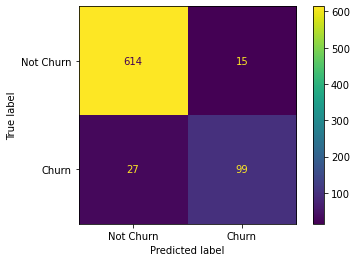

In [85]:
plot_confusion_matrix(best_model, x_test, y_test, display_labels=['Not Churn', 'Churn'])

In [86]:
features=list(best_model[0].transformers_[0][1].get_feature_names_out())+list(x.columns[best_model[0].transformers_[1][2]])

In [87]:
best_model

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('scalar', MinMaxScaler()), ('sampling', SMOTE()),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

In [88]:
features

['PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'Gender_Male',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'CustomerID',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [107]:
pd.DataFrame({'important':best_model[3].feature_importances_},index=features).sort_values('important',ascending=False).head(5)

,important
Tenure,0.425464
NumberOfAddress,0.139039
Complain,0.068202
NumberOfDeviceRegistered,0.041591
DaySinceLastOrder,0.038842


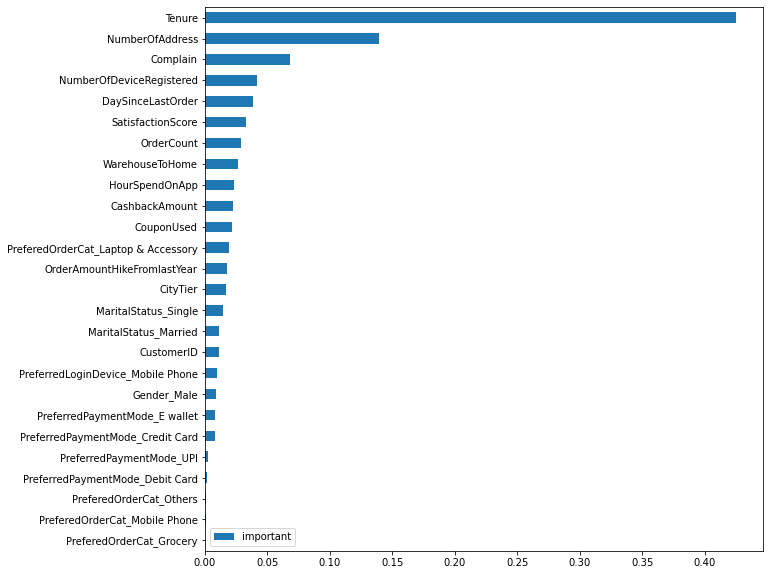

In [90]:
# Visualizatin
pd.DataFrame({'important':best_model[3].feature_importances_},index=features).sort_values('important',ascending=True).plot(kind='barh',figsize=(10,10))
plt.show()

Berdasarkan hasil dari Feature Importance, didapati bahwa Feature yang paling berpengaruh terhadap pelanggan yang melakukan churn yaitu Tenure dari para pelanggan

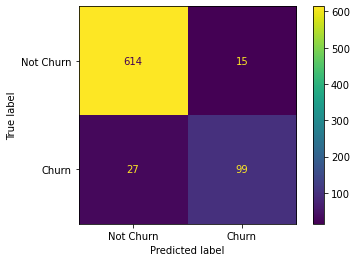

In [95]:
plot_confusion_matrix(best_model, x_test, y_test, display_labels=['Not Churn', 'Churn'])

Evaluasi terhadap biaya yang akan dikeluarkan jika kita menggunakan model **XGBoost** yang sudah kita buat seperti yang sudah di sebutkan pada bagian **Problem Statement** bahwa untuk mendapatkan pelanggan baru memerlukan biaya **5 kali lebih besar** dibandingkan kita mempertahankan pelanggan kita( [sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate#:~:text=Customer%20churn%20rate%20is%20the,up%20and%20stay%20with%20you.)). Sehingga dapat kita analisa sebegai berikut:

1. Pelanggan yang *True Negative* memerlukan biaya **0**.
2. Pelanggan yang *False negative* memerlukan biaya yang lebih banyak yaitu harus mengeluarkan biaya yang besar yaitu untuk iklan dan lain lain. Perlu mengeluarkan biaya sebesar **5** * biaya.
3. Pelanggan yang teridentifikasi churn ( *True Positive dan False Positif* ) kita akan mengeluarkan **1 * biaya untuk memberikan biaya retensi** misalnya berupa voucher diskon untuk mempertahankan pelanggan ini 


Hasil :
1. Kondisi Paling Buruk <br>
Perusahaan tidak menggunakan model untuk memprediksi pelanggan yang akan Churn. padahal terdapat 126 pelanggan yang akan churn sehingga memerlukan biaya 5 * 126 pelanggan = **630 (p)**

2. Fokus pemberian kupon pada setiap pelanggan <br>
Memberikan kupon diskon kepada setiap pelanggan yaitu sebesar 1 * 755 pelanggan = **755 (p)**

3. Kondisi Paling Baik<br>
Perusahaan mempunyai prediksi pelanggan yang akan Churn dan akan diberikan kupon diskon dengan biaya : 1* 126 = **126(p)**

4. Menggunakan Model yang sekarang <br>
Menggunakan model XGBoost akan mengeluarkan biaya sebesar :
(5 * 27 pelanggan) + (1* 99) = **234 (p)**


In [106]:
data = pd.DataFrame(data={'No model' :[630], 'Diskon kepada semua pelanggan':[755], 'kondisi paling ideal': [126], 'Model': [234]}, index=['Perkiraan Biaya'])
biaya= data.T.sort_values('Perkiraan Biaya',ascending=False)

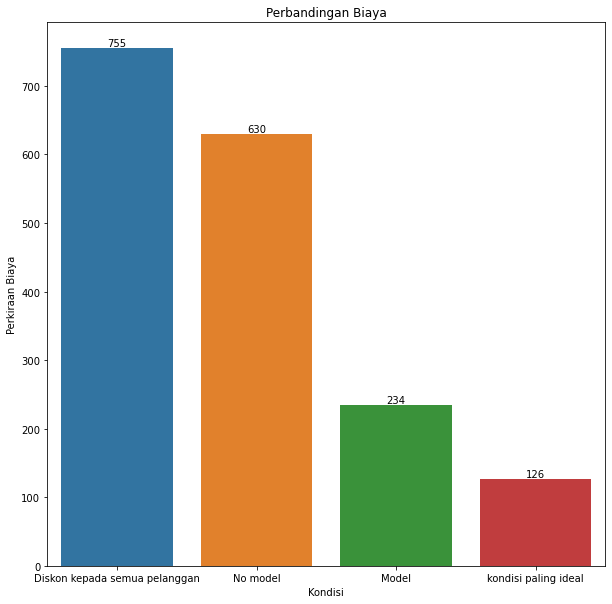

In [97]:
plt.figure(figsize=(10,10))
ax=sns.barplot(biaya.index,biaya['Perkiraan Biaya'])
plt.title('Perbandingan Biaya')
plt.xlabel('Kondisi')
ax.bar_label(ax.containers[0])
plt.show()

* Berdasarkan hasil plotting diatas dapat kita simpulkan bahwa kita dapat menekan biaya pengeluaran perusahaan dengan menggunakan model yang sudah kita buat dengan rincian sebagai berikut:
    1. Menghemat biaya sebesar **50 %** dari skenario kondisi terburuk perusahaan.
    2. Mengehemat biaya sebesar **70 %** dari skenario memberikan voucher diskon kepada setiap pelanggan.

Sehingga dengan menggunakan model yang sudah dibuat, perusahaan dapat menghemat sampai dengan 70 % dari total pengeluarannya.
    

## Model Limitation

Setelah Dilakukan Proses permodelan, model ini berlaku pada interval tertentu dengan rincian sebagai berikut :
* **Tenure** < 37
* **WarehouseToHome** < 36.5
* **HourSpendOnApp** > 0.5 & <4.5
* **NumberDeviceOfRegistered** >1.5 & <5.5
* **NumberOfAddress** <12
* **OrderAmountHikeFromlastYear** <25.5
* **CouponUsed** <3.5
* **OrderCount** < 6
* **DaySinceLastOrder** < 14.5
* **CashBackAmount** >69.825 & <272.625

# Kesimpulan & Rekomendasi 

1. Dari analisa yang sudah dilakukan model yang memiliki performa paling maksimal yaitu menggunakan model **GradientBoost Classifier** dengan dilakukan hyperparameter tuning.
2. Parameter yang paling baik menggunakan parameter : max_depth=5, n_estimators=200, 'model__learning_rate': 0.1, 'model__max_depth': 5,'model__n_estimators': 200.
3. Nilai Recall dan Precision dari kelas positif yaitu masing-masing sebesar **87% dan 79%**
4. Fitur paling berpengaruh pada model yaitu **Tenure, NumberOfAddress dan Complain**
5. Dengan menggunakan model ini dapat menghemat sampai dengan **70 %** total pengeluaran perusahaan dibandingkan dengan perusahan tidak menggunakan model.

**Rekomendasi** :
1. Dapat menggunakan algoritma Machine Learning lain seperti CatBoost, LightLgbm.
2. Menambahkan Feature lain seperti Tanggal Transaksi, kota asal dan lain-lain yang berhubungan dengan Perusahaan E-Commerce
3. Menggunakan sumber lain dalam perhitungan biaya Customer Acquisition dan mempertahankan pelanggan.
4. Data yang di analisa tidak seimbang (Imbalance) sehingga dapat menggunakan algoritma statistik lain.